<img style="float: left; margin: 30px 15px 15px 15px;" src="https://pngimage.net/wp-content/uploads/2018/06/logo-iteso-png-5.png" width="300" height="500" /> 
    
    
### <font color='navy'> Simulación de procesos financieros. 

**Nombre:** Brisa Fernanda González Arredondo.

**Fecha:** 07 de mayo del 2020.

**Expediente** : IF714993.
**Profesor:** Oscar David Jaramillo Zuluaga.

# Tarea 10: Clase 22

## Enunciado de tarea.
> Replicar el procedimiento visto en clase para valoración de opciones 'call', pero en este caso para opciones tipo 'put'.

### Ejercicio 1:

In [43]:
#importar los paquetes que se van a usar
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
%matplotlib inline
#algunas opciones para Pandas
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [44]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry')
#aapl

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-06-19,75.0,call,AAPL200619C00075000,...,2020-05-07 16:37:07,2020-04-17 19:16:55,"{'contractSymbol': 'AAPL200619C00075000', 'str..."
2020-06-19,75.0,put,AAPL200619P00075000,...,2020-05-07 16:37:07,2020-05-06 19:52:54,"{'contractSymbol': 'AAPL200619P00075000', 'str..."
2021-01-15,75.0,call,AAPL210115C00075000,...,2020-05-07 16:37:07,2020-05-01 16:10:32,"{'contractSymbol': 'AAPL210115C00075000', 'str..."
2021-01-15,75.0,put,AAPL210115P00075000,...,2020-05-07 16:37:07,2020-05-07 15:01:21,"{'contractSymbol': 'AAPL210115P00075000', 'str..."
2021-06-18,75.0,call,AAPL210618C00075000,...,2020-05-07 16:37:07,2020-04-09 14:58:06,"{'contractSymbol': 'AAPL210618C00075000', 'str..."
...,...,...,...,...,...,...,...
2022-01-21,500.0,put,AAPL220121P00500000,...,2020-05-07 16:37:10,2020-05-05 19:50:00,"{'contractSymbol': 'AAPL220121P00500000', 'str..."
2022-01-21,505.0,call,AAPL220121C00505000,...,2020-05-07 16:37:10,2020-05-05 17:38:05,"{'contractSymbol': 'AAPL220121C00505000', 'str..."
2022-01-21,510.0,call,AAPL220121C00510000,...,2020-05-07 16:37:10,2020-05-06 16:53:47,"{'contractSymbol': 'AAPL220121C00510000', 'str..."


In [45]:
aapl_opt.Underlying_Price[0]

303.6999

In [46]:
aapl_opt.loc[0, 'JSON']

{'contractSymbol': 'AAPL200619C00075000',
 'strike': 75.0,
 'currency': 'USD',
 'lastPrice': 204.0,
 'change': 0.0,
 'percentChange': 0.0,
 'volume': 15,
 'openInterest': 33,
 'bid': 228.6,
 'ask': 229.85,
 'contractSize': 'REGULAR',
 'expiration': 1592524800,
 'lastTradeDate': 1587151015,
 'impliedVolatility': 1.8710943945312501,
 'inTheMoney': True}

In [47]:
fecha1 = '2020-06-19'
fecha2 = '2021-01-15'
put06_f1 = aapl_opt.loc[(aapl_opt.Expiry== fecha1) & (aapl_opt.Type=='put')]
put06_f2 = aapl_opt.loc[(aapl_opt.Expiry== fecha2) & (aapl_opt.Type=='put')]
put06_f1

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1,75.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-05-06 19:52:54,"{'contractSymbol': 'AAPL200619P00075000', 'str..."
7,80.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-05-04 13:44:14,"{'contractSymbol': 'AAPL200619P00080000', 'str..."
13,85.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-05-05 15:36:29,"{'contractSymbol': 'AAPL200619P00085000', 'str..."
19,90.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-05-06 19:15:45,"{'contractSymbol': 'AAPL200619P00090000', 'str..."
25,95.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-04-30 17:27:27,"{'contractSymbol': 'AAPL200619P00095000', 'str..."
...,...,...,...,...,...,...,...
1746,440.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-04-30 13:47:33,"{'contractSymbol': 'AAPL200619P00440000', 'str..."
1764,450.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-01-31 17:18:29,"{'contractSymbol': 'AAPL200619P00450000', 'str..."
1797,470.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-01-31 17:16:19,"{'contractSymbol': 'AAPL200619P00470000', 'str..."
1831,490.0,2020-06-19,put,...,2020-05-07 16:37:07,2020-02-10 17:09:39,"{'contractSymbol': 'AAPL200619P00490000', 'str..."


In [48]:
# Función para descargar precios de cierre ajustados:
def get_adj_closes(tickers, start_date=None, end_date=None):
    # Fecha inicio por defecto (start_date='2010-01-01') y fecha fin por defecto (end_date=today)
    # Descargamos DataFrame con todos los datos
    closes = web.DataReader(name=tickers, data_source='yahoo', start=start_date, end=end_date)
    # Solo necesitamos los precios ajustados en el cierre
    closes = closes['Adj Close']
    # Se ordenan los índices de manera ascendente
    closes.sort_index(inplace=True)
    return closes

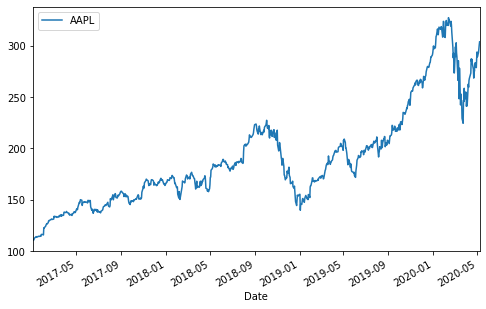

In [49]:
ticker = ['AAPL']
start_date = '2017-01-01'

closes_aapl = get_adj_closes(ticker, start_date)
closes_aapl.plot(figsize=(8,5));
plt.legend(ticker);

In [50]:
def calc_daily_ret(closes):
    return np.log(closes/closes.shift(1)).iloc[1:]

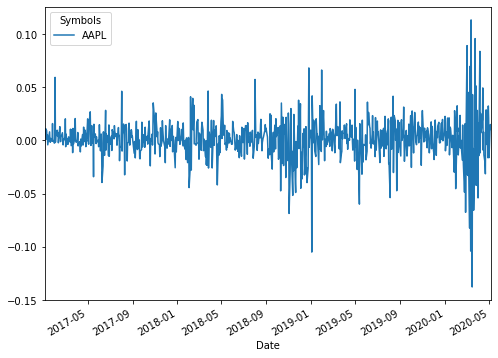

In [51]:
ret_aapl = calc_daily_ret(closes_aapl)
ret_aapl.plot(figsize=(8,6));

In [52]:
aapl = web.YahooOptions('AAPL')
aapl_opt = aapl.get_all_data().reset_index()
aapl_opt.set_index('Expiry').sort_index()

,Strike,Type,Symbol,...,Quote_Time,Last_Trade_Date,JSON
Expiry,,,,,,,
2020-05-08,242.5,call,AAPL200508C00242500,...,2020-05-07 16:37:20,2020-05-07 15:57:32,"{'contractSymbol': 'AAPL200508C00242500', 'str..."
2020-05-08,285.0,put,AAPL200508P00285000,...,2020-05-07 16:37:20,2020-05-07 16:21:21,"{'contractSymbol': 'AAPL200508P00285000', 'str..."
2020-05-08,345.0,put,AAPL200508P00345000,...,2020-05-07 16:37:20,2020-05-05 19:18:34,"{'contractSymbol': 'AAPL200508P00345000', 'str..."
2020-05-08,345.0,call,AAPL200508C00345000,...,2020-05-07 16:37:20,2020-05-07 15:53:26,"{'contractSymbol': 'AAPL200508C00345000', 'str..."
2020-05-08,190.0,put,AAPL200508P00190000,...,2020-05-07 16:37:20,2020-05-01 14:56:10,"{'contractSymbol': 'AAPL200508P00190000', 'str..."
...,...,...,...,...,...,...,...
2022-06-17,160.0,call,AAPL220617C00160000,...,2020-05-07 16:37:11,2020-04-30 19:27:17,"{'contractSymbol': 'AAPL220617C00160000', 'str..."
2022-06-17,160.0,put,AAPL220617P00160000,...,2020-05-07 16:37:11,2020-05-06 16:32:40,"{'contractSymbol': 'AAPL220617P00160000', 'str..."
2022-06-17,300.0,put,AAPL220617P00300000,...,2020-05-07 16:37:11,2020-05-07 16:11:08,"{'contractSymbol': 'AAPL220617P00300000', 'str..."


In [53]:
K = 290 # strike price
indice_opt = aapl_opt.loc[(aapl_opt.Type=='put') & (aapl_opt.Strike==K) & (aapl_opt.Expiry=='2021-01-15')]
indice_opt

,Strike,Expiry,Type,...,Quote_Time,Last_Trade_Date,JSON
1114,290.0,2021-01-15,put,...,2020-05-07 16:37:22,2020-05-07 16:19:01,"{'contractSymbol': 'AAPL210115P00290000', 'str..."


In [54]:
i_opt= indice_opt.index
opcion_valuar = aapl_opt.loc[i_opt[0]]
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 27.49,
 'change': -1.8600006,
 'percentChange': -6.3373103,
 'volume': 8,
 'openInterest': 10112,
 'bid': 27.05,
 'ask': 27.6,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588868341,
 'impliedVolatility': 0.3455570816040039,
 'inTheMoney': False}

In [55]:
print('Precio del activo subyacente actual = ',opcion_valuar.Underlying_Price)

Precio del activo subyacente actual =  303.68


In [56]:
# Obtenemos el rendimiento simple
Ri = closes_aapl.pct_change(1).iloc[1:]
# Obtenemos su media y desviación estándar de los rendimientos
mu_R = Ri.mean()[0]
sigma_R = Ri.std()[0]
Ri

Symbols,AAPL
Date,
2017-01-04,-0.001
2017-01-05,0.005
2017-01-06,0.011
2017-01-09,0.009
2017-01-10,0.001
...,...
2020-05-01,-0.016
2020-05-04,0.014
2020-05-05,0.015


In [57]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry


nscen = 10
dates = pd.date_range(start = today, end = expiry, freq='B')
ndays = len(dates)
dates

DatetimeIndex(['2020-05-07', '2020-05-08', '2020-05-11', '2020-05-12',
               '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-18',
               '2020-05-19', '2020-05-20',
               ...
               '2021-01-04', '2021-01-05', '2021-01-06', '2021-01-07',
               '2021-01-08', '2021-01-11', '2021-01-12', '2021-01-13',
               '2021-01-14', '2021-01-15'],
              dtype='datetime64[ns]', length=182, freq='B')

In [58]:
dt = 1; # Rendimiento diario 
Z = np.random.randn(ndays,nscen)  # Z ~ N(0,1)
# Simulación normal de los rendimientos
Ri_dt = pd.DataFrame(mu_R*dt+Z*sigma_R*np.sqrt(dt),index=dates)
Ri_dt.cumprod()

,0,1,2,...,7,8,9
2020-05-07,3.847e-02,-1.938e-02,1.351e-02,...,-3.971e-02,2.700e-02,1.987e-02
2020-05-08,8.031e-05,-2.683e-04,2.049e-05,...,-6.701e-04,4.842e-04,-4.494e-04
2020-05-11,8.844e-07,-1.124e-06,-5.633e-08,...,-2.746e-06,6.868e-07,-2.903e-07
2020-05-12,1.623e-08,4.705e-10,6.174e-10,...,6.136e-08,-1.204e-08,-6.959e-10
2020-05-13,-2.485e-10,-2.744e-12,2.376e-11,...,-7.084e-10,1.604e-10,-4.949e-12
...,...,...,...,...,...,...,...
2021-01-11,-0.000e+00,0.000e+00,-0.000e+00,...,-0.000e+00,0.000e+00,-0.000e+00
2021-01-12,0.000e+00,-0.000e+00,-0.000e+00,...,0.000e+00,0.000e+00,-0.000e+00
2021-01-13,0.000e+00,-0.000e+00,-0.000e+00,...,0.000e+00,0.000e+00,0.000e+00
2021-01-14,0.000e+00,-0.000e+00,-0.000e+00,...,-0.000e+00,-0.000e+00,-0.000e+00


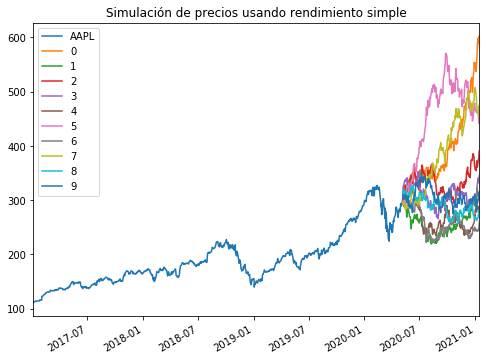

In [59]:
# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T = S_0*(1+Ri_dt).cumprod()

# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,S_T]).plot(figsize=(8,6));
plt.title('Simulación de precios usando rendimiento simple');

In [60]:
ri = calc_daily_ret(closes_aapl)
# Usando la media y desviación estándar de los rendimientos logarítmicos
mu_r = ri.mean()[0]
sigma_r = ri.std()[0]

# # Usando la equivalencia teórica
# mu_r2 = mu_R - (sigma_R**2)/2

sim_ret_ri = pd.DataFrame(mu_r*dt+Z*sigma_r*np.sqrt(dt), index=dates)

# Simulación del precio
S_0 = closes_aapl.iloc[-1,0]
S_T2 = S_0*np.exp(sim_ret_ri.cumsum())

# Se muestran los precios simulados con los precios descargados
# pd.concat([closes_aapl,S_T2]).plot(figsize=(8,6));
# plt.title('Simulación de precios usando rendimiento logarítmico');

# from sklearn.metrics import mean_absolute_error
e1 = np.abs(S_T-S_T2).mean().mean()
e1

0.5142114344357236

In [61]:
print('Las std usando rendimientos logarítmicos y simples son similares')
sigma_R,sigma_r

Las std usando rendimientos logarítmicos y simples son similares


(0.019176841551830408, 0.019217664710921272)

In [62]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 27.49,
 'change': -1.8600006,
 'percentChange': -6.3373103,
 'volume': 8,
 'openInterest': 10112,
 'bid': 27.05,
 'ask': 27.6,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588868341,
 'impliedVolatility': 0.3455570816040039,
 'inTheMoney': False}

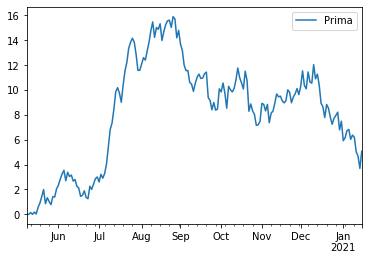

In [63]:
strike = pd.DataFrame(opcion_valuar['JSON']['strike']*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-mu_r*ndays) \
              *np.fmax(strike-S_T2,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [64]:
mu = ret_aapl.mean()[0]
sigma = ret_aapl.std()[0]
mu, sigma

(0.0012000755304706488, 0.019217664710921272)

In [65]:
# Tasa de bonos de 1 yr de fecha 30/04/20 -> 0.16%
r = 0.0016/360 # Tasa diaria

In [66]:
from datetime import date

today = pd.Timestamp(date.today())
expiry = opcion_valuar.Expiry

ndays = (expiry - today).days
nscen = 10
dates = pd.date_range(start='2019-11-14', periods = ndays)
dates

DatetimeIndex(['2019-11-14', '2019-11-15', '2019-11-16', '2019-11-17',
               '2019-11-18', '2019-11-19', '2019-11-20', '2019-11-21',
               '2019-11-22', '2019-11-23',
               ...
               '2020-07-14', '2020-07-15', '2020-07-16', '2020-07-17',
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23'],
              dtype='datetime64[ns]', length=253, freq='D')

In [67]:
sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r, index=dates)
sim_ret.cumsum()
# Las columnas son los escenarios y las filas son las días de contrato

,0,1,2,...,7,8,9
2019-11-14,-0.062,3.815e-02,0.042,...,-0.030,0.002,-0.007
2019-11-15,-0.035,5.772e-02,0.042,...,0.003,-0.013,0.021
2019-11-16,-0.017,3.257e-02,0.059,...,-0.031,-0.024,0.004
2019-11-17,-0.022,1.513e-04,0.088,...,-0.048,-0.015,0.010
2019-11-18,-0.019,2.153e-03,0.085,...,-0.062,0.010,-0.018
...,...,...,...,...,...,...,...
2020-07-19,0.410,4.629e-02,0.040,...,0.009,0.231,-0.253
2020-07-20,0.410,2.649e-02,0.037,...,0.024,0.236,-0.283
2020-07-21,0.403,-7.518e-04,0.002,...,0.014,0.241,-0.274
2020-07-22,0.392,-1.586e-02,-0.004,...,0.045,0.199,-0.262


In [68]:
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular
sim_closes = S0*np.exp(sim_ret.cumsum())
sim_closes

,0,1,2,...,7,8,9
2019-11-14,285.302,315.500,316.845,...,294.653,304.344,301.702
2019-11-15,293.306,321.734,316.567,...,304.549,299.689,310.233
2019-11-16,298.673,313.745,322.088,...,294.296,296.422,305.015
2019-11-17,297.087,303.736,331.768,...,289.572,299.119,306.696
2019-11-18,297.904,304.345,330.505,...,285.396,306.838,298.416
...,...,...,...,...,...,...,...
2020-07-19,457.381,318.078,316.236,...,306.385,382.619,235.923
2020-07-20,457.796,311.844,315.109,...,311.214,384.535,228.839
2020-07-21,454.544,303.462,304.344,...,307.900,386.327,230.865
2020-07-22,449.613,298.911,302.578,...,317.523,370.674,233.732


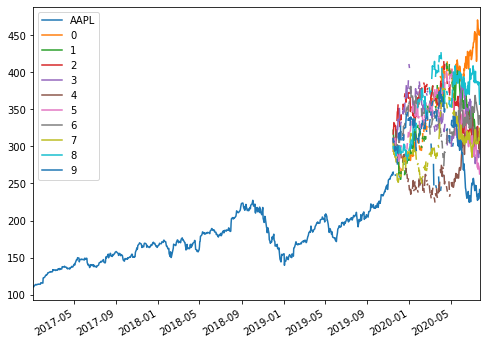

In [69]:
# Se muestran los precios simulados con los precios descargados
pd.concat([closes_aapl,sim_closes]).plot(figsize=(8,6));

In [70]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 27.49,
 'change': -1.8600006,
 'percentChange': -6.3373103,
 'volume': 8,
 'openInterest': 10112,
 'bid': 27.05,
 'ask': 27.6,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588868341,
 'impliedVolatility': 0.3455570816040039,
 'inTheMoney': False}

In [71]:
sigma = 0.3455570816040039/np.sqrt(252)
sigma

0.02176805004051064

In [72]:
from datetime import date
Hoy = date.today()
K = opcion_valuar['JSON']['strike']  # strike price
ndays = (opcion_valuar.Expiry - today).days
nscen = 100000
dates = pd.date_range(start= Hoy, periods = ndays)
S0 = closes_aapl.iloc[-1,0]  # Condición inicial del precio a simular

sim_ret = pd.DataFrame(sigma*np.random.randn(ndays,nscen)+r,index=dates)
sim_closes = S0*np.exp(sim_ret.cumsum())
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)}, index=dates)
#simul = pd.concat([closes_aapl.T,strike.T,sim_closes.T]).T
#simul.plot(figsize=(8,6),legend=False);

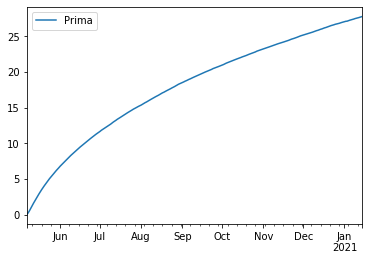

In [73]:
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes,np.zeros([ndays,nscen])).mean(axis=1)}, index=dates)
put.plot();

In [74]:
# Con un intervarlo de confianza del 99%
put.iloc[-1]

Prima    27.734
Name: 2021-01-14 00:00:00, dtype: float64

In [75]:
confianza = 0.99
sigma_est = sim_closes.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(26.795893130448675, 28.671196991922464)
(26.79591102779649, 28.67117909457465)


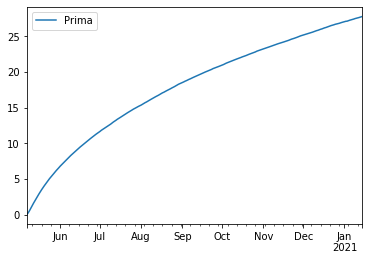

In [77]:
# Usando muestreo estratificado----> #estratros = nscen
U = (np.arange(0,nscen)+np.random.rand(ndays,nscen))/nscen
Z = st.norm.ppf(U)

sim_ret2 = pd.DataFrame(sigma*Z+r,index=dates)
sim_closes2 = S0*np.exp(sim_ret.cumsum())

# Función de pago
strike = pd.DataFrame(K*np.ones([ndays,nscen]), index=dates)
put = pd.DataFrame({'Prima':np.exp(-r*ndays) \
              *np.fmax(strike-sim_closes2,np.zeros([ndays,nscen])).T.mean()}, index=dates)
put.plot();

In [79]:
put.iloc[-1]

Prima    27.734
Name: 2021-01-14 00:00:00, dtype: float64

In [80]:
confianza = 0.99
sigma_est = sim_closes2.iloc[-1].sem()
mean_est = put.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i2)

(26.795893130448675, 28.671196991922464)
(26.79591102779649, 28.67117909457465)


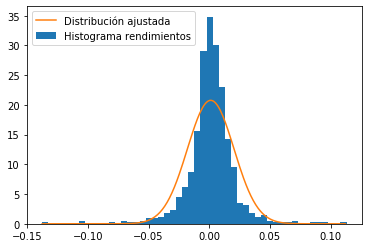

In [81]:
#Ajustando Norm
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

mu_fit,sd_fit = st.norm.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.norm.pdf(ren_gen,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

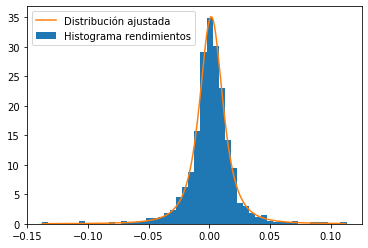

In [82]:
#Ajustando t
ren = calc_daily_ret(closes_aapl) # rendimientos 
y,x,des = plt.hist(ren['AAPL'],bins=50,density=True,label='Histograma rendimientos')

dof,mu_fit,sd_fit = st.t.fit(ren) # Se ajustan los parámetros de una normal
# Valores máximo y mínimo de los rendiemientos a generar
# ren_max = max(x);ren_min = min(x)
# Vector de rendimientos generados
ren_gen = np.arange(ren_min,ren_max,0.001)
# Generación de la normal ajustado con los parámetros encontrados
curve_fit = st.t.pdf(ren_gen,df=dof,loc=mu_fit,scale=sd_fit)
plt.plot(ren_gen,curve_fit,label='Distribución ajustada')
plt.legend()
plt.show()

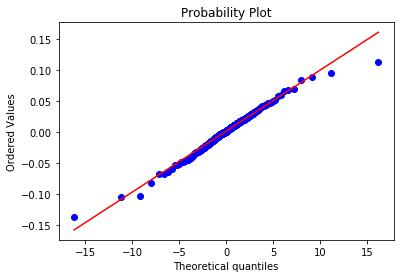

In [83]:
st.probplot(ren['AAPL'],sparams= dof, dist='t', plot=plt);

In [100]:
#Valuación
ndays = 109 
nscen = 10

In [101]:
prob = y/np.sum(y)
values = x[1:]

In [102]:
ret = np.random.choice(values, ndays*nscen, p=prob)
dates = pd.date_range(start=Hoy,periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_ret_hist

,0,1,2,...,7,8,9
2020-05-07,0.008,-0.002,0.003,...,0.003,0.008,-0.002
2020-05-08,0.098,0.018,-0.012,...,-0.002,0.008,-0.002
2020-05-09,-0.022,0.008,0.063,...,0.008,0.013,-0.012
2020-05-10,0.033,0.008,0.113,...,0.008,0.003,0.008
2020-05-11,0.008,0.013,0.003,...,-0.002,0.013,-0.002
...,...,...,...,...,...,...,...
2020-08-19,-0.007,-0.007,-0.002,...,-0.002,0.008,0.063
2020-08-20,0.003,-0.002,0.003,...,0.028,0.018,-0.007
2020-08-21,-0.022,0.013,0.018,...,0.038,0.003,-0.012
2020-08-22,0.003,0.008,0.033,...,-0.017,0.023,0.033


In [103]:
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())
sim_closes_hist

,0,1,2,...,7,8,9
2020-05-07,306.066,303.010,304.534,...,304.534,306.066,303.010
2020-05-08,337.615,308.461,300.819,...,303.853,308.461,302.332
2020-05-09,330.166,310.875,320.375,...,306.230,312.438,298.644
2020-05-10,341.203,313.307,358.759,...,308.626,313.307,300.980
2020-05-11,343.873,317.347,359.756,...,307.936,317.347,300.307
...,...,...,...,...,...,...,...
2020-08-19,601.187,436.068,622.676,...,449.395,592.205,460.811
2020-08-20,602.858,435.092,624.408,...,462.092,602.858,457.479
2020-08-21,589.557,440.702,635.640,...,479.941,604.535,451.897
2020-08-22,591.197,444.150,656.887,...,471.713,618.505,467.003


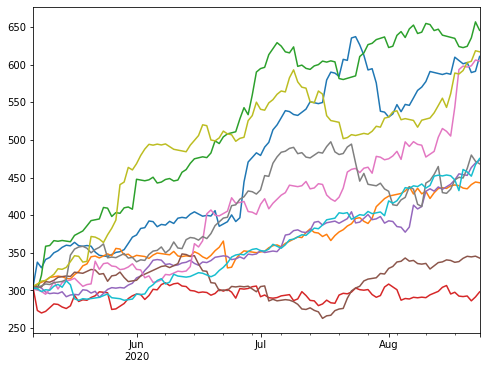

In [104]:
sim_closes_hist.plot(figsize=(8,6),legend=False);

Text(0.5, 1.0, 'Simulación usando el histograma de los rendimientos')

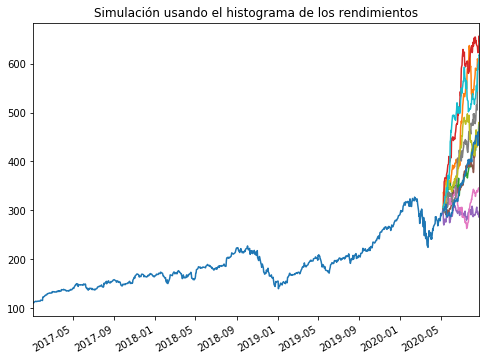

In [105]:
pd.concat([closes_aapl,sim_closes_hist]).plot(figsize=(8,6),legend=False);
plt.title('Simulación usando el histograma de los rendimientos')

In [106]:
K=240
ndays = 109
nscen = 10000
freq, values = np.histogram(ret_aapl+r-mu, bins=2000)
prob = freq/np.sum(freq)
ret=np.random.choice(values[1:],ndays*nscen,p=prob)
dates=pd.date_range('2018-10-29',periods=ndays)
sim_ret_hist = pd.DataFrame(ret.reshape((ndays,nscen)),index=dates)
sim_closes_hist = (closes_aapl.iloc[-1,0])*np.exp(sim_ret_hist.cumsum())

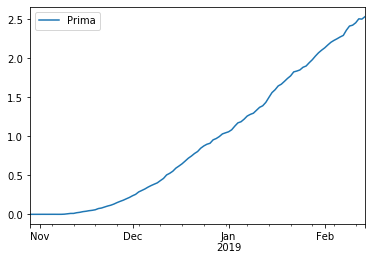

In [107]:
strike = pd.DataFrame(K*np.ones(ndays*nscen).reshape((ndays,nscen)), index=dates)
put_hist = pd.DataFrame({'Prima':np.exp(-r*ndays)*np.fmax(strike-sim_closes_hist,np.zeros(ndays*nscen).reshape((ndays,nscen))).T.mean()}, index=dates)
put_hist.plot();

In [108]:
put_hist.iloc[-1]

Prima    2.536
Name: 2019-02-14 00:00:00, dtype: float64

In [109]:
opcion_valuar['JSON']

{'contractSymbol': 'AAPL210115P00290000',
 'strike': 290.0,
 'currency': 'USD',
 'lastPrice': 27.49,
 'change': -1.8600006,
 'percentChange': -6.3373103,
 'volume': 8,
 'openInterest': 10112,
 'bid': 27.05,
 'ask': 27.6,
 'contractSize': 'REGULAR',
 'expiration': 1610668800,
 'lastTradeDate': 1588868341,
 'impliedVolatility': 0.3455570816040039,
 'inTheMoney': False}

In [110]:
confianza = 0.95
sigma_est = sim_closes_hist.iloc[-1].sem()
mean_est = put_hist.iloc[-1].Prima
i1 = st.t.interval(confianza,nscen-1, loc=mean_est, scale=sigma_est)
i2 = st.norm.interval(confianza, loc=mean_est, scale=sigma_est)
print(i1)
print(i1)

(1.2985421660361034, 3.774182978936957)
(1.2985421660361034, 3.774182978936957)
